# Loading the required modules

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Loading the dataset

In [2]:
iris_dataset = datasets.load_iris()
X, y = iris_dataset.data, iris_dataset.target

iris_df = pd.DataFrame(data=X, columns=iris_dataset.feature_names)
iris_df["target"] = y

In [3]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Splitting the dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset["data"],
    iris_dataset["target"],
    random_state=42,
    test_size=0.27,
    shuffle=True,
)

# Preprocessing the data using StandardScaler


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a Logistic Regression classifier

In [6]:
log_reg = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=951)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=951)

# Predicting

In [7]:
y_pred = log_reg.predict(X_test_scaled)

# Evaluating the classifier

In [8]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [9]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# Classification Report

In [10]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        13

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



# Confusion Matrix

In [11]:
cm = confusion_matrix(y_test, y_pred)

# Visualizing Confusion Matrix

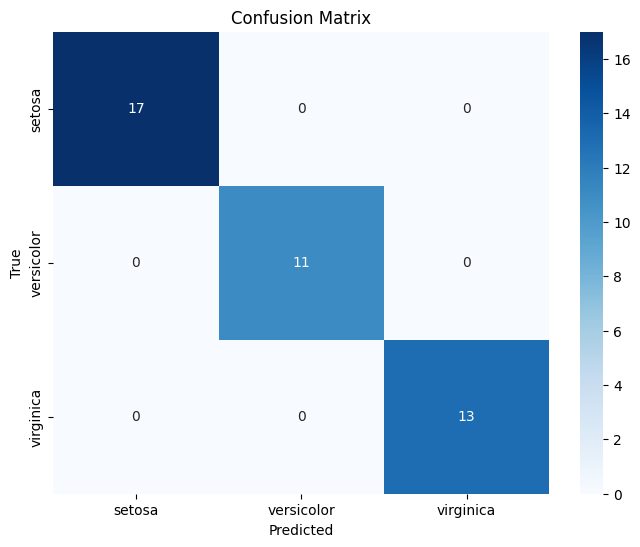

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris_dataset.target_names, yticklabels=iris_dataset.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#  Feature Importance

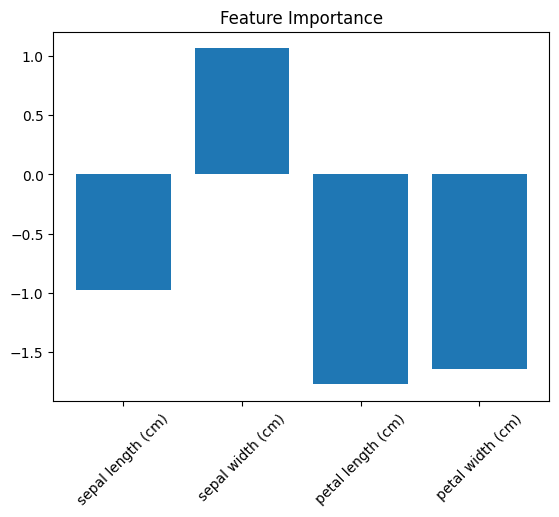

In [13]:
plt.bar(iris_dataset.feature_names, log_reg.coef_[0])
plt.xticks(rotation=45)
plt.title("Feature Importance")
plt.show()

# Visualizing Decision Boundaries

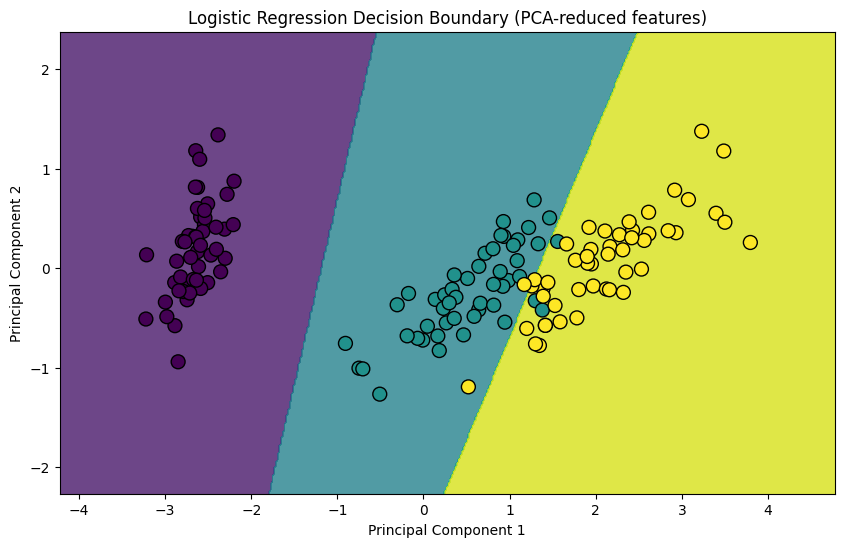

In [14]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train Logistic Regression on PCA components
model_pca = LogisticRegression()
model_pca.fit(X_pca, y)

# Create a mesh grid for plotting
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict for each point in the mesh
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', s=100)
plt.title('Logistic Regression Decision Boundary (PCA-reduced features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()